In [1]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns

#Colour Palette
sns.reset_orig()
my_palette = sns.color_palette('colorblind')
plt.style.use("seaborn-colorblind")

/Users/shuayb/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shuayb/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/shuayb/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Imports
import numpy as np
import pandas as pd

titanic = pd.read_csv("train.csv")

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. Generate a series of bar charts to describe the gender, ticket class and survival of the passengers onboard. [1 point]

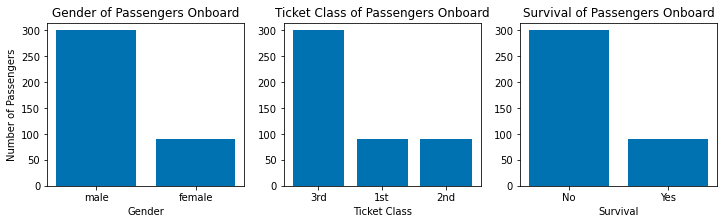

In [4]:
fig, ax = plt.subplots(1,3,figsize = (12,3))

df = pd.DataFrame(titanic[['Sex','Survived','Pclass']].value_counts())
df = df.reset_index()
df['Survived'] = df['Survived'].replace({0:'No',1:'Yes'})
df['Pclass'] = df['Pclass'].replace({1:'1st',2:'2nd',3:'3rd'})

ax[0].bar(data=df, x='Sex', height='count')
ax[1].bar(data=df, x='Pclass',height='count')
ax[2].bar(data=df, x='Survived', height='count')

ax[0].set(title="Gender of Passengers Onboard",xlabel="Gender",ylabel="Number of Passengers")
ax[1].set(title="Ticket Class of Passengers Onboard",xlabel="Ticket Class")
ax[2].set(title="Survival of Passengers Onboard",xlabel="Survival")

plt.show()

### 2. Generate a histogram for the passengers’ age. Furthermore, describe the passengers’ age using the following two boxplots: age per ticket class and age based on survival. [1 point]

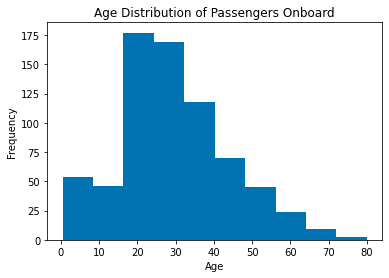

In [5]:
plt.hist(x=titanic['Age'],bins=10)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers Onboard')

plt.show()

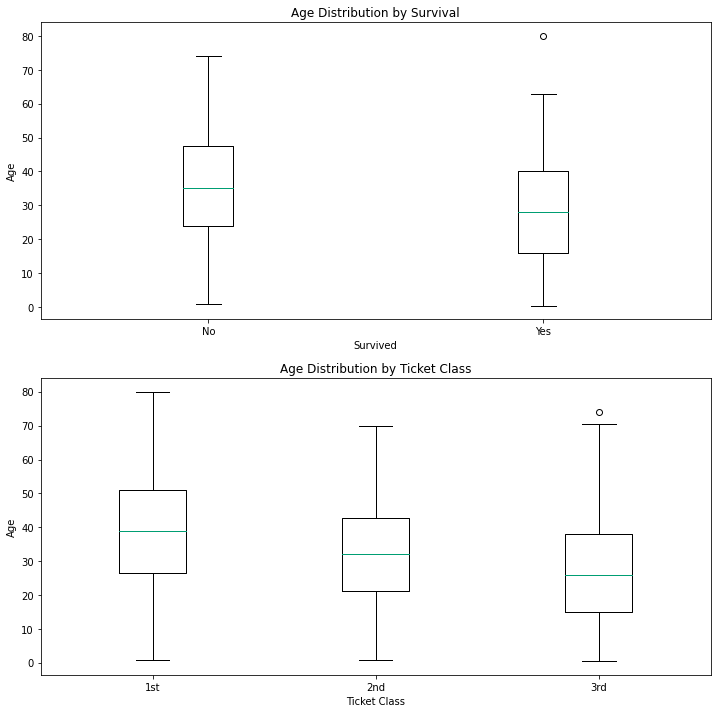

In [6]:
fig, ax = plt.subplots(2,1,figsize=(12,12))

df = pd.DataFrame(titanic[['Age','Survived','Pclass']].value_counts())
df = df.reset_index()

ax[0].boxplot([df['Age'][df['Survived']==0],
            df['Age'][df['Survived']==1]])

ax[1].boxplot([df['Age'][df['Pclass']==1],
            df['Age'][df['Pclass']==2],
            df['Age'][df['Pclass']==3]])

ax[0].set(title="Age Distribution by Survival",xlabel="Survived",ylabel="Age",xticklabels=['No','Yes'])
ax[1].set(title="Age Distribution by Ticket Class",xlabel="Ticket Class",ylabel="Age",xticklabels=['1st','2nd','3rd'])

plt.show()

### 3. Generate a histogram for the travel fare and a table showing the number of people who did not pay – you may want to check on Google why a handful of people was on board for free! [1 points]

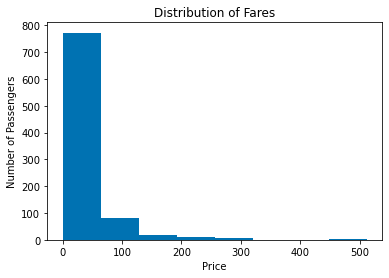

In [7]:
plt.hist(x=titanic['Fare'],bins=8)

plt.title("Distribution of Fares")
plt.xlabel("Price")
plt.ylabel("Number of Passengers")

plt.show()

In [8]:
titanic[titanic['Fare']<=0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


### 4. A chart of your choice to describe the family size per ticket class [1.5 points]

/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_13796/2883442912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Famsize'] = df['SibSp'] + df['Parch']
/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_13796/2883442912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pclass'] = df['Pclass'].replace({1:'1st Class',2:'2nd Class',3:'3rd Class'})


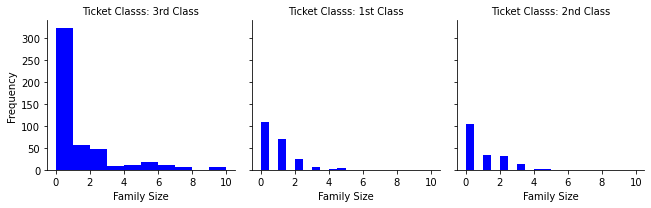

In [9]:
df = titanic[['Pclass','SibSp','Parch']]
df['Famsize'] = df['SibSp'] + df['Parch']
df['Pclass'] = df['Pclass'].replace({1:'1st Class',2:'2nd Class',3:'3rd Class'})

plot = sns.FacetGrid(df, col='Pclass', height=3, aspect=1)
plot.map(plt.hist, 'Famsize',bins=10,color='blue')

plot.set(xlabel="Family Size",ylabel="Frequency")
plot.set_titles(col_template="Ticket Classs: {col_name}")


plt.show()

### 5. A series of stacked bar charts to show the how survival differs for different gender and ticket class [1.5 points]

/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_13796/1991564666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['Survived'] = df0['Survived'].replace({0:'No',1:'Yes'})


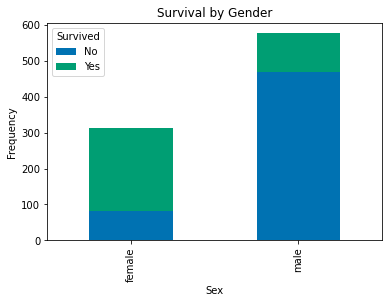

In [10]:
df0 = titanic[['Sex','Survived']]
df0['Survived'] = df0['Survived'].replace({0:'No',1:'Yes'})
df0 = (df0.value_counts()).reset_index()
df0 = (df0.pivot(index='Sex',columns='Survived',values='count')).reset_index()

df0.plot(x='Sex', kind='bar', stacked=True, title="Survival by Gender",ylabel='Frequency')
plt.show()

/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_13796/748268229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Survived'] = df1['Survived'].replace({0:'No',1:'Yes'})
/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_13796/748268229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pclass'] = df1['Pclass'].replace({1:'1st',2:'2nd',3:'3rd'})


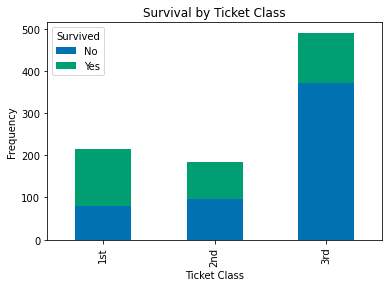

In [11]:
df1 = titanic[['Pclass','Survived']]
df1['Survived'] = df1['Survived'].replace({0:'No',1:'Yes'})
df1['Pclass'] = df1['Pclass'].replace({1:'1st',2:'2nd',3:'3rd'})

df1 = (df1.value_counts()).reset_index()
df1 = (df1.pivot(index='Pclass',columns='Survived',values='count')).reset_index()

df1.plot(x='Pclass', kind='bar', stacked=True, title="Survival by Ticket Class",ylabel='Frequency',xlabel='Ticket Class')
plt.show()

### 6. A violin chart describing how survival related to age and gender [1.5 points]

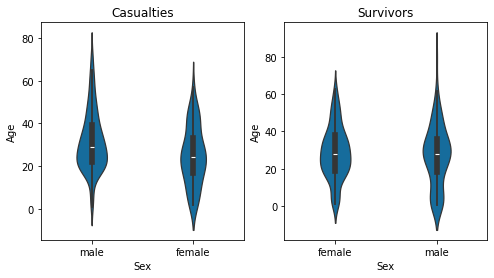

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.violinplot(data = titanic[titanic['Survived']==0], x = 'Sex', y = 'Age', ax = ax[0], width = 0.3)
sns.violinplot(data = titanic[titanic['Survived']==1], x = 'Sex', y = 'Age', ax = ax[1], width = 0.3)


ax[0].set(title="Casualties")
ax[1].set(title="Survivors")

plt.show()

### 7. A violin chart describing the survival rate related to age and ticket class [1.5 points]

/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_13796/1348737169.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set(title="Casualties",xlabel="Ticket Class",xticklabels=['1st','2nd','3rd'])
/var/folders/kz/gkr3vj392y93zt9m0pdb0cr40000gn/T/ipykernel_13796/1348737169.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set(title="Survivors",xlabel="Ticket Class",xticklabels=['1st','2nd','3rd'])


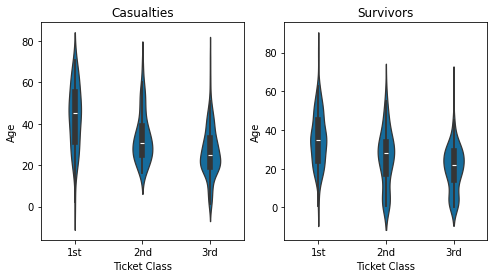

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

sns.violinplot(data = titanic[titanic['Survived']==0], x = 'Pclass', y = 'Age', ax = ax[0], width = 0.3)
sns.violinplot(data = titanic[titanic['Survived']==1], x = 'Pclass', y = 'Age', ax = ax[1], width = 0.3)


ax[0].set(title="Casualties",xlabel="Ticket Class",xticklabels=['1st','2nd','3rd'])
ax[1].set(title="Survivors",xlabel="Ticket Class",xticklabels=['1st','2nd','3rd'])

plt.show()